In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Part 1: Prepare the Data

In [2]:
# read the myopia data into a dataframe
myopia_df = pd.read_csv('myopia.csv')

myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# remove the MYOPIC column from the dataset
myopia_df = myopia_df.drop(columns=['MYOPIC'])

myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [11]:
# standardize myopia dataset
scaler = StandardScaler()
myopia_scaled = scaler.fit_transform(myopia_df)

# # create new dataframe for scaled data
# scaled_df = pd.DataFrame(myopia_scaled, columns=myopia_df.columns)
# scaled_df.head()

### Part 2: Apply Dimensionality Reduction

In [5]:
# perform dimensionality reduction with PCA

# initialize the PCA model that preserves 90% of explained variance
pca = PCA(n_components=0.9)

# reduce dimensions
myopia_pca = pca.fit_transform(myopia_scaled)

# check the shape to check number of dimensions after reduction
myopia_pca.shape

(618, 10)

#### How did the number of the features change?

The number of features decreased from 14 to 10. The model only reduced to 10 features in order to preserve 90% of the explained variance.

In [6]:
# further reduce the dataset dimensions with t-SNE

# initialize tSNE model
tsne = TSNE(learning_rate = 30)

# reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)

# check the shape to check number of dimensions after reduction
tsne_features.shape

C:\Users\apfle\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

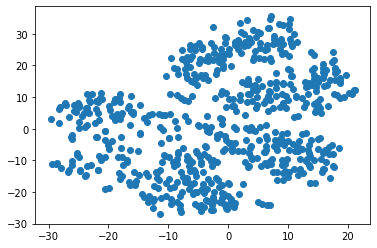

In [7]:
# create a scatter plot of the t-SNE output
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

#### Are there distinct clusters?

There are not obvious distinct clusters.

### Part 3: Perform a Cluster Analysis with K-means

In [8]:
# avoid memory leak and supress warning with KMeans
import os
os.environ["OMP_NUM_THREADS"] = '2'

import warnings
warnings.filterwarnings('ignore')

In [9]:
# create an elbow plot to identify the best number of clusters
inertia = []
k = list(range(1,11))

# look for the best number of clusters (best k) by calculating inertia
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(scaled_df)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,8652.000000
1,2,7497.115123
2,3,6732.095466
3,4,6362.286058
4,5,6083.180361


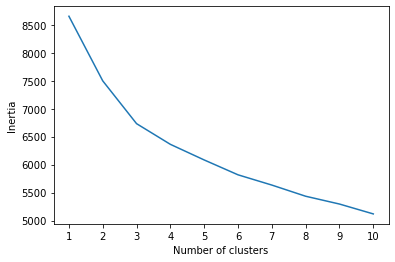

In [10]:
# plot elbow curve to find the best candidate for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### Determine where the elbow of the plot is, and at which value of k it appears.

The elbow of the plot is when k is 3. This means that the K-Means model would suggest 3 clusters could be the optimal number of clusters.

### Part 4: Make a Recommendation

#### Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters?

The patients cannot be easily clustered into just a couple of clusters. Instead, the PCA recommendation of 10 clusters seems to be optimal. This is because it preserves 90% of the explained variance from the original dataset, while also creating distinct clusters.